In [18]:
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
queries = ['공연장', '노래방', '놀이동산', '도서관', '미술관', '영화관']
location_color = {
  '공연장': 'red',
  '노래방': 'orange',
  '놀이동산': 'pink',
  '도서관': 'green',
  '미술관': 'blue',
  '영화관': 'purple',
}

In [3]:
def convert_tsv(location_type: str):
  df = pd.read_csv(f"{location_type}.csv", sep="\t")
  df['type'] = location_type
  return df

In [4]:
df = pd.concat([convert_tsv(query) for query in queries])
df = df.reset_index()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16136 entries, 0 to 16135
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   16136 non-null  int64  
 1   x       16136 non-null  int64  
 2   y       16136 non-null  int64  
 3   ID      16136 non-null  int64  
 4   NAME    16136 non-null  object 
 5   CATE    16136 non-null  object 
 6   lat     16136 non-null  float64
 7   long    16136 non-null  float64
 8   type    16136 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 1.1+ MB


In [110]:
# 37.747405	127.041112
re_df = df[((37.747405 - df['long']) ** 2 + (127.041112 - df['lat']) ** 2) < 2e-4]
m = folium.Map(re_df[['long', 'lat']].mean().values.tolist())
popup = folium.Popup(min_width=200, max_width=200)
for index in re_df.index:
  folium.Marker(
    location=[re_df.loc[index, 'long'], re_df.loc[index, 'lat']],
    fill=True,
    popup=folium.Popup(re_df.loc[index, 'NAME'], max_width=400),
    icon=folium.Icon(color=location_color[re_df.loc[index, 'type']])
    ).add_to(m)
m.fit_bounds([
  re_df[['long', 'lat']].min().values.tolist(),
  re_df[['long', 'lat']].max().values.tolist(),
])
m

1062


In [70]:
부동산_df = pd.read_excel('부동산.xlsx')
부동산_df['거래금액'] = 부동산_df['거래금액(만원)'].map(lambda x: x.replace(',', '') + '0000').astype(int)
부동산_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201693 entries, 0 to 201692
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       201693 non-null  object 
 1   번지        201693 non-null  object 
 2   본번        201693 non-null  object 
 3   부번        201693 non-null  int64  
 4   단지명       201693 non-null  object 
 5   전용면적(㎡)   201693 non-null  float64
 6   계약년월      201693 non-null  int64  
 7   계약일       201693 non-null  int64  
 8   거래금액(만원)  201693 non-null  object 
 9   층         201693 non-null  int64  
 10  건축년도      201693 non-null  int64  
 11  도로명       201693 non-null  object 
 12  해제사유발생일   9275 non-null    float64
 13  거래금액      201693 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 21.5+ MB


In [71]:
부동산_df['지번'] = 부동산_df['시군구'] + " " + 부동산_df['번지']
부동산_df

시군구   번지    본번  부번                 단지명   전용면적(㎡)    계약년월  \
0       경기도 가평군 가평읍 달전리  281  0281   0               세대넥스빌  122.2800  202010   
1       경기도 가평군 가평읍 달전리  281  0281   0               세대넥스빌   58.9500  202012   
2       경기도 가평군 가평읍 달전리  281  0281   0               세대넥스빌   58.9500  202102   
3       경기도 가평군 가평읍 달전리  281  0281   0               세대넥스빌   58.9500  202102   
4       경기도 가평군 가평읍 달전리  281  0281   0               세대넥스빌  122.2800  202103   
...                 ...  ...   ...  ..                 ...       ...     ...   
201688  경기도 화성시 향남읍 행정리  475  0475   0  화성향남시범복사꽃마을상록하늘채아파   84.8478  202109   
201689  경기도 화성시 향남읍 행정리  475  0475   0  화성향남시범복사꽃마을상록하늘채아파   84.8478  202109   
201690  경기도 화성시 향남읍 행정리  475  0475   0  화성향남시범복사꽃마을상록하늘채아파   84.8478  202109   
201691  경기도 화성시 향남읍 행정리  475  0475   0  화성향남시범복사꽃마을상록하늘채아파   84.8478  202109   
201692  경기도 화성시 향남읍 행정리  475  0475   0  화성향남시범복사꽃마을상록하늘채아파   84.8478  202109   

        계약일        거래금액(만원)   층  건축년도      도로명     해제사유발생일       거래금액  \
0        11          20,700   5  1996   달전로 59         NaN  207000000   
1        29          10,600  12  1996   달전로 59         NaN  106000000   
2        24          11,500  17  1996   달전로 59  20210225.0  115000000   
3        24          11,500  17  1996   달전로 59         NaN  115000000   
4         5          18,300  18  1996   달전로 59  20210429.0  183000000   
...     ...             ...  ..   ...      ...         ...        ...   
201688    6          46,500  11  2009  행정동로 83         NaN  465000000   
201689   10          44,800  10  2009  행정동로 83         NaN  448000000   
201690   15          44,500   8  2009  행정동로 83         NaN  445000000   
201691   18          46,500   7  2009  행정동로 83         NaN  465000000   
201692   20          39,500  15  2009  행정동로 83         NaN  395000000   

                         지번  
0       경기도 가평군 가평읍 달전리 281  
1       경기도 가평군 가평읍 달전리 281  
2       경기도 가평군 가평읍 달전리 281  
3       경기도 가평군 가평읍 달전리 281  
4       경기도 가평군 가평읍 달전리 281  
...                     ...  
201688  경기도 화성시 향남읍 행정리 475  
201689  경기도 화성시 향남읍 행정리 475  
201690  경기도 화성시 향남읍 행정리 475  
201691  경기도 화성시 향남읍 행정리 475  
201692  경기도 화성시 향남읍 행정리 475  

[201693 rows x 15 columns]

In [72]:
주소_df = pd.read_excel('주소.xls')
주소_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6477 entries, 0 to 6476
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   도로명주소   6289 non-null   object 
 1   지번주소    6477 non-null   object 
 2   위도      6289 non-null   float64
 3   경도      6289 non-null   float64
 4   상태      6477 non-null   object 
dtypes: float64(2), object(3)
memory usage: 253.1+ KB


In [73]:
주소_df['지번'] = 주소_df['지번주소']

In [74]:
부동산_주소_df = 부동산_df.merge(주소_df, how='inner', on='지번')
부동산_주소_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128443 entries, 0 to 128442
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       128443 non-null  object 
 1   번지        128443 non-null  object 
 2   본번        128443 non-null  object 
 3   부번        128443 non-null  int64  
 4   단지명       128443 non-null  object 
 5   전용면적(㎡)   128443 non-null  float64
 6   계약년월      128443 non-null  int64  
 7   계약일       128443 non-null  int64  
 8   거래금액(만원)  128443 non-null  object 
 9   층         128443 non-null  int64  
 10  건축년도      128443 non-null  int64  
 11  도로명       128443 non-null  object 
 12  해제사유발생일   6723 non-null    float64
 13  거래금액      128443 non-null  int64  
 14  지번        128443 non-null  object 
 15  도로명주소     123435 non-null  object 
 16  지번주소      128443 non-null  object 
 17  위도        123435 non-null  float64
 18  경도        123435 non-null  float64
 19  상태        128443 non-null  object 
dtypes: f

In [82]:
부동산_주소_중복제거_총합_df = 부동산_주소_df.drop_duplicates('지번주소')
부동산_주소_중복제거_총합_df['개수'] = 부동산_주소_중복제거_총합_df.apply(lambda x: df[((x['위도'] - df['long']) ** 2 + (x['경도'] - df['lat']) ** 2) < 2e-4].size, axis=1)
부동산_주소_중복제거_총합_df.head()

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


시군구      번지    본번  부번       단지명  전용면적(㎡)    계약년월  계약일  \
0   경기도 가평군 가평읍 달전리     281  0281   0     세대넥스빌  122.280  202010   11   
10  경기도 가평군 가평읍 달전리   285-1  0285   1        신초   59.305  202103    8   
17  경기도 가평군 가평읍 달전리     339  0339   0        유성   58.770  202011   16   
24  경기도 가평군 가평읍 대곡리  230-18  0230  18  삼성웰타운아파트   83.268  202010   21   
27  경기도 가평군 가평읍 대곡리   402-1  0402   1        썬힐   64.850  202101   22   

          거래금액(만원)   층  ...       도로명     해제사유발생일       거래금액  \
0           20,700   5  ...    달전로 59         NaN  207000000   
10           8,300   3  ...    달전로 64  20210408.0   83000000   
17           6,350   3  ...    달전로 39         NaN   63500000   
24          25,250   6  ...  굴다리길 7-1         NaN  252500000   
27          17,200  12  ...    문화로 63  20210405.0  172000000   

                        지번                  도로명주소                    지번주소  \
0      경기도 가평군 가평읍 달전리 281    경기도 가평군 가평읍 안반지길 20     경기도 가평군 가평읍 달전리 281   
10   경기도 가평군 가평읍 달전리 285-1     경기도 가평군 가평읍 달전로 64   경기도 가평군 가평읍 달전리 285-1   
17     경기도 가평군 가평읍 달전리 339     경기도 가평군 가평읍 달전로 39     경기도 가평군 가평읍 달전리 339   
24  경기도 가평군 가평읍 대곡리 230-18  경기도 가평군 가평읍 굴다리길 7-20  경기도 가평군 가평읍 대곡리 230-18   
27   경기도 가평군 가평읍 대곡리 402-1     경기도 가평군 가평읍 문화로 63   경기도 가평군 가평읍 대곡리 402-1   

           위도          경도                              상태   개수  
0   37.814008  127.520068  변환완료(도로명주소업데이트;위도업데이트;경도업데이트;)   54  
10  37.813304  127.519603  변환완료(도로명주소업데이트;위도업데이트;경도업데이트;)   54  
17  37.814976  127.518264  변환완료(도로명주소업데이트;위도업데이트;경도업데이트;)   63  
24  37.825354  127.514396  변환완료(도로명주소업데이트;위도업데이트;경도업데이트;)  225  
27  37.818349  127.510465  변환완료(도로명주소업데이트;위도업데이트;경도업데이트;)  198  

[5 rows x 21 columns]

In [108]:
부동산_주소_중복제거_총합_df[부동산_주소_중복제거_총합_df['개수'] > 1000]

시군구       번지    본번   부번          단지명   전용면적(㎡)    계약년월  계약일  \
74368   경기도 의정부시 가능동   651-14  0651   14         동일수정   49.9550  202010    6   
74432   경기도 의정부시 가능동      754  0754    0      신동아파라디움   84.9500  202011   10   
74450   경기도 의정부시 가능동   725-25  0725   25           일심   82.0050  202010   19   
79769  경기도 의정부시 의정부동    487-4  0487    4        남해오네뜨   15.7546  202012    9   
80005  경기도 의정부시 의정부동      490  0490    0      신도아크라티움  138.3343  202010   28   
80221  경기도 의정부시 의정부동    482-3  0482    3  젠하우트(482-3)   22.4600  202011   14   
80242  경기도 의정부시 의정부동  240-111  0240  111         토암비체   37.1000  202107   17   

             거래금액(만원)   층  ...            도로명 해제사유발생일       거래금액  \
74368          14,000   5  ...     가능로85번길 10     NaN  140000000   
74432          26,000   5  ...         시민로 49     NaN  260000000   
74450          23,000   2  ...  가능로50번길 13-19     NaN  230000000   
79769           6,500  10  ...         시민로 27     NaN   65000000   
80005          55,000  18  ...         시민로 24     NaN  550000000   
80221           6,500   4  ...     둔야로33번길 22     NaN   65000000   
80242          11,000   8  ...    호국로1267번길 6     NaN  110000000   

                          지번                   도로명주소                   지번주소  \
74368    경기도 의정부시 가능동 651-14     경기도 의정부시 가능로85번길 10    경기도 의정부시 가능동 651-14   
74432       경기도 의정부시 가능동 754         경기도 의정부시 시민로 49       경기도 의정부시 가능동 754   
74450    경기도 의정부시 가능동 725-25  경기도 의정부시 가능로50번길 13-19    경기도 의정부시 가능동 725-25   
79769    경기도 의정부시 의정부동 487-4         경기도 의정부시 시민로 27    경기도 의정부시 의정부동 487-4   
80005      경기도 의정부시 의정부동 490         경기도 의정부시 시민로 24      경기도 의정부시 의정부동 490   
80221    경기도 의정부시 의정부동 482-3     경기도 의정부시 둔야로33번길 22    경기도 의정부시 의정부동 482-3   
80242  경기도 의정부시 의정부동 240-111    경기도 의정부시 호국로1267번길 6  경기도 의정부시 의정부동 240-111   

              위도          경도                              상태    개수  
74368  37.747405  127.041112  변환완료(도로명주소업데이트;위도업데이트;경도업데이트;)  1062  
74432  37.738704  127.040532  변환완료(도로명주소업데이트;위도업데이트;경도업데이트;)  1044  
74450  37.746200  127.037702  변환완료(도로명주소업데이트;위도업데이트;경도업데이트;)  1080  
79769  37.738522  127.038029  변환완료(도로명주소업데이트;위도업데이트;경도업데이트;)  1026  
80005  37.737859  127.037805  변환완료(도로명주소업데이트;위도업데이트;경도업데이트;)  1008  
80221  37.739110  127.038462  변환완료(도로명주소업데이트;위도업데이트;경도업데이트;)  1044  
80242  37.743934  127.044990  변환완료(도로명주소업데이트;위도업데이트;경도업데이트;)  1017  

[7 rows x 21 columns]

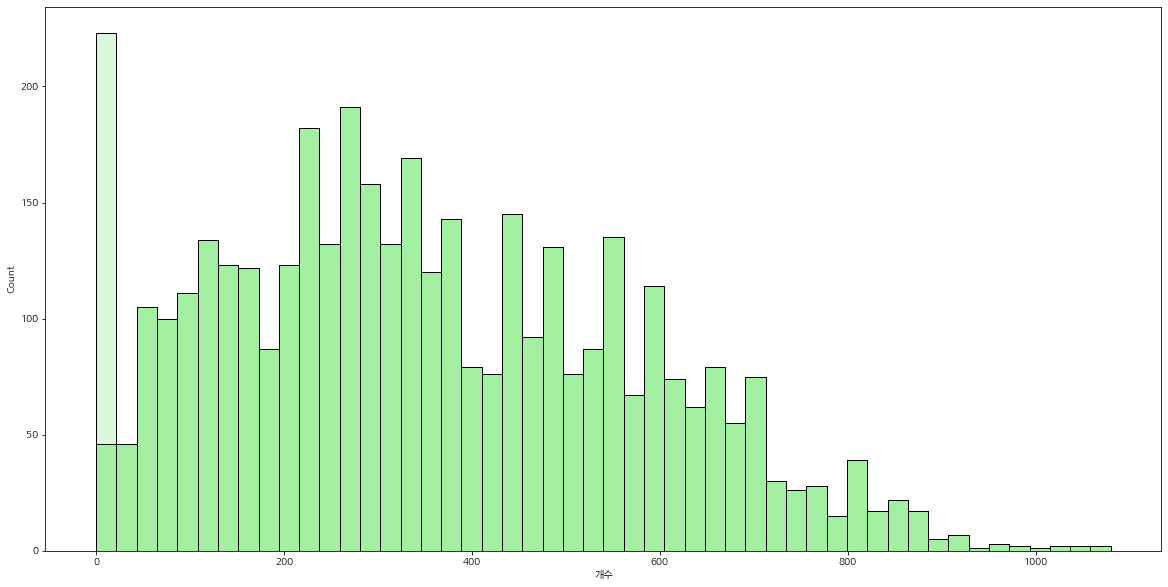

In [85]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(20, 10))
sns.histplot(data=부동산_주소_중복제거_총합_df, x='개수', bins=50, color='lightgreen', alpha=0.3, binrange=[0, 부동산_주소_중복제거_총합_df.max()])
sns.histplot(부동산_주소_중복제거_총합_df[부동산_주소_중복제거_총합_df != 0], x='개수', bins=50, color='lightgreen', binrange=[0, 부동산_주소_중복제거_총합_df.max()])
plt.show()

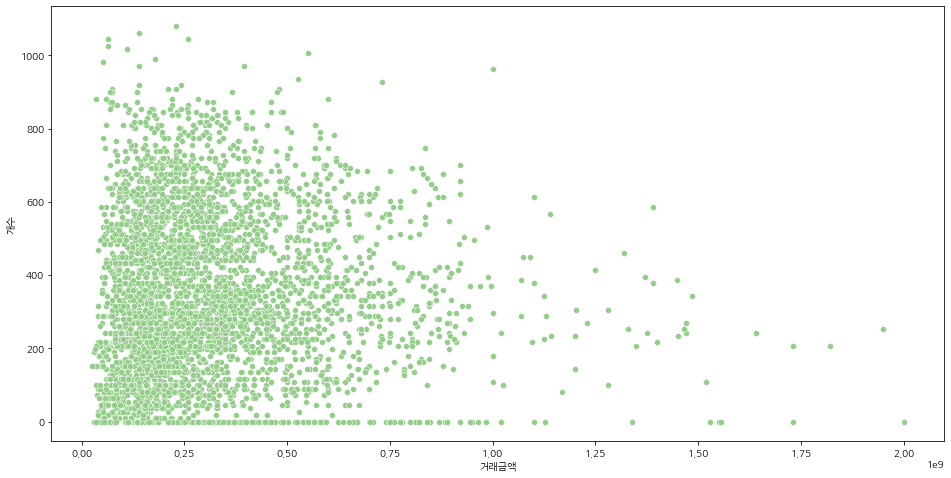

In [107]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=부동산_주소_중복제거_총합_df, x='거래금액', y='개수', color='#94cd8a')
plt.show()

In [91]:
부동산_주소_중복제거_총합_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3967 entries, 0 to 128402
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       3967 non-null   object 
 1   번지        3967 non-null   object 
 2   본번        3967 non-null   object 
 3   부번        3967 non-null   int64  
 4   단지명       3967 non-null   object 
 5   전용면적(㎡)   3967 non-null   float64
 6   계약년월      3967 non-null   int64  
 7   계약일       3967 non-null   int64  
 8   거래금액(만원)  3967 non-null   object 
 9   층         3967 non-null   int64  
 10  건축년도      3967 non-null   int64  
 11  도로명       3967 non-null   object 
 12  해제사유발생일   184 non-null    float64
 13  거래금액      3967 non-null   int64  
 14  지번        3967 non-null   object 
 15  도로명주소     3830 non-null   object 
 16  지번주소      3967 non-null   object 
 17  위도        3830 non-null   float64
 18  경도        3830 non-null   float64
 19  상태        3967 non-null   object 
 20  개수        3967 non-null   in